In [2]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar.plot import DotPlot

import sys
sys.path.append('../')
import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt
import seaborn as sns

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Control_Experiments (Fig2)/Vemurafenib_Kubiniok_2017'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/ST/vemurafenib_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/ST/vemurafenib_mann_whitney_fpr.tsv', sep='\t', index_col=0)

#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

(782.2273609441778, 0.0, 0.0, 1.0)

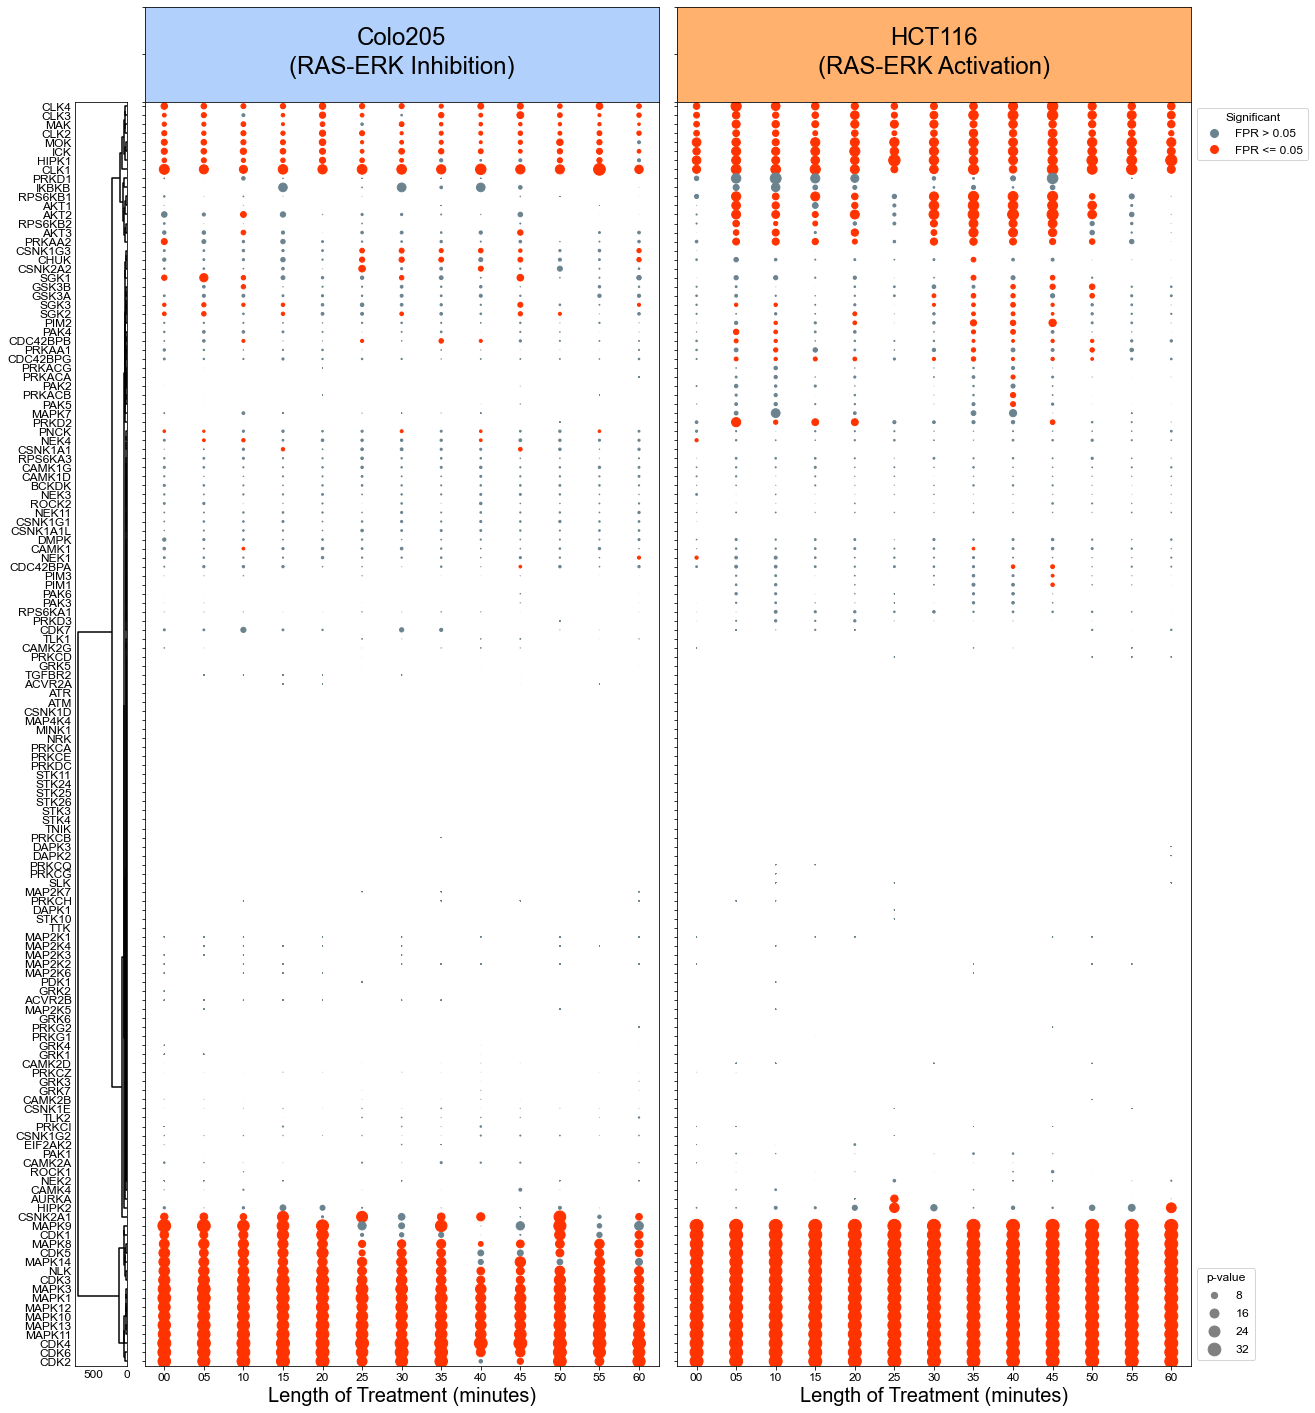

In [5]:
significant = fpr.copy()
results = -np.log10(activities)


#Setup subplots so that dendrograms are included
fig, axes = plt.subplots(figsize = (20, 25), 
        nrows = 2, ncols = 3, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = { 
            'width_ratios':[0.1,1, 1],
            'height_ratios': [0.075,1]
        },)
fig.subplots_adjust(wspace=0.05, hspace=0)


#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots_all = DotPlot(results, 
                       significant, 
                       figsize = (6,15),
                       dotsize = 5,
                       legend_title='-log10(p-value)', 
                      xlabel = False)
dots_all.cluster(orientation = 'left', ax = axes[1,0], method='ward')

####Colo206 dotplot, using the same kinase order from full dendrogram
#create xlabel dict
xlabel_dict = {}
for col in results.columns[0:13]:
    if col == 'Colo.T00' or col == 'Colo.T05':
        xlabel_dict[col] = col[-1]
    else:
        xlabel_dict[col] = col[-2:]
dots_Colo = DotPlot(results.loc[dots_all.values.index[::-1], results.columns[0:13]], 
                       significant.loc[dots_all.values.index[::-1], results.columns[0:13]], 
                       figsize = (6,15),
                       dotsize = 5,
                       x_label_dict = xlabel_dict)
dots_Colo.dotplot(ax = axes[1,1], color_legend = False, size_legend = False)
#adjust x-axis labels
axes[1,1].set_xlabel('Length of Treatment (minutes)', fontsize = 20)
labels = axes[1,1].get_xticklabels()
axes[1,1].set_xticklabels(labels, rotation = 0)

###HCT116 dotplot, using the same kinase order from full dendrogram
xlabel_dict = {}
for col in results.columns[13:]:
    if col == 'HCT.T00' or col == 'HCT.T05':
        xlabel_dict[col] = col[-1]
    else:
        xlabel_dict[col] = col[-2:]
dots_HCT = DotPlot(results.loc[dots_all.values.index[::-1], results.columns[13:]], 
                       significant.loc[dots_all.values.index[::-1], results.columns[13:]], 
                       figsize = (6,15),
                       dotsize = 5,
                      x_label_dict = xlabel_dict)
dots_HCT.dotplot(ax = axes[1,2])
#adjust x-axis
axes[1,2].set_xlabel('Length of Treatment (minutes)', fontsize = 20)
labels = axes[1,2].get_xticklabels()
axes[1,2].set_xticklabels(labels, rotation = 0)

cmap = sns.color_palette('colorblind')
#Add titles to each dotplot
axes[0,1].annotate('Colo205', (np.arange(13)[6]*10+5,0.6), ha = 'center', fontsize = 24)
axes[0,1].annotate('(RAS-ERK Inhibition)', (np.arange(13)[6]*10+5,0.3), ha = 'center', fontsize = 24)
axes[0,1].set(facecolor = '#b1d1fc')
axes[0,2].annotate('HCT116', (np.arange(13)[6]*10+5,0.6), ha = 'center', fontsize = 24)
axes[0,2].annotate('(RAS-ERK Activation)', (np.arange(13)[6]*10+5,0.3), ha = 'center', fontsize = 24)
axes[0,2].set(facecolor = '#ffb16d')

#turn upper left axis off so does not show gridlines
axes[0,0].axis('off')

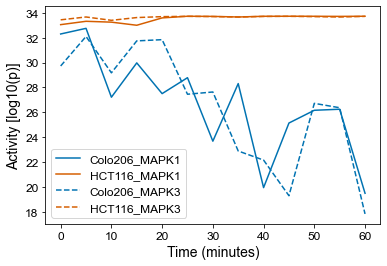

In [7]:
x = np.linspace(0,60,13)
kinase1 = 'MAPK1'
kinase2 = 'MAPK3'
y = -np.log10(activities.loc[kinase1])
plt.plot(x, y[0:13], label = 'Colo206_'+kinase1, color = cmap[0])
plt.plot(x, y[13:], label = 'HCT116_'+kinase1, color = cmap[3])
y = -np.log10(activities.loc[kinase2])
plt.plot(x, y[0:13], label = 'Colo206_'+kinase2, color = cmap[0], linestyle = 'dashed')
plt.plot(x, y[13:], label = 'HCT116_'+kinase2, color = cmap[3], linestyle = 'dashed')
plt.xlabel('Time (minutes)', fontsize = 14)
plt.ylabel('Activity [log10(p)]', fontsize = 14)
#plt.title('MAPK1/3 Response')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.legend(fontsize = 12, title_fontsize = 14)